In [2]:
import numpy as np
import pandas as pd
path1 = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/Pandas+Course+Resources/Pandas Course Resources/project_data/project_transactions.csv'
project_transactions = pd.read_csv(path1)
project_transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0


In [3]:
project_transactions.info(show_counts = True)  # can check null value count, memory usage, data type, columns , index range

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int64  
 3   PRODUCT_ID         2146311 non-null  int64  
 4   QUANTITY           2146311 non-null  int64  
 5   SALES_VALUE        2146311 non-null  float64
 6   STORE_ID           2146311 non-null  int64  
 7   RETAIL_DISC        2146311 non-null  float64
 8   WEEK_NO            2146311 non-null  int64  
 9   COUPON_DISC        2146311 non-null  float64
 10  COUPON_MATCH_DISC  2146311 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [4]:
project_transactions.memory_usage(deep = True)  # memory usage in detail

Index                     128
household_key        17170488
BASKET_ID            17170488
DAY                  17170488
PRODUCT_ID           17170488
QUANTITY             17170488
SALES_VALUE          17170488
STORE_ID             17170488
RETAIL_DISC          17170488
WEEK_NO              17170488
COUPON_DISC          17170488
COUPON_MATCH_DISC    17170488
dtype: int64

In [5]:
project_transactions = project_transactions.astype({'DAY':'int16','QUANTITY':'int16','STORE_ID':'int32','WEEK_NO':'int16'})

In [6]:
project_transactions.info(show_counts = True)  # memory reduction is 180.1MB - 135.1MB = 45MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   household_key      2146311 non-null  int64  
 1   BASKET_ID          2146311 non-null  int64  
 2   DAY                2146311 non-null  int16  
 3   PRODUCT_ID         2146311 non-null  int64  
 4   QUANTITY           2146311 non-null  int16  
 5   SALES_VALUE        2146311 non-null  float64
 6   STORE_ID           2146311 non-null  int32  
 7   RETAIL_DISC        2146311 non-null  float64
 8   WEEK_NO            2146311 non-null  int16  
 9   COUPON_DISC        2146311 non-null  float64
 10  COUPON_MATCH_DISC  2146311 non-null  float64
dtypes: float64(4), int16(3), int32(1), int64(3)
memory usage: 135.1 MB


In [7]:
project_transactions.isna().sum()   # there is no missing value in data

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [8]:
project_transactions['household_key'].nunique()  # No. of unique housholds

2099

In [9]:
project_transactions['PRODUCT_ID'].nunique() # No. of unique products

84138

In [10]:
# Columns creation (and droping columns at the end)
project_transactions = project_transactions.assign(total_discount = (project_transactions['RETAIL_DISC']+project_transactions['COUPON_DISC']))
project_transactions = project_transactions.assign(perc_discount = (project_transactions['total_discount']/project_transactions['SALES_VALUE']).abs())
conditions = [(project_transactions['perc_discount']>1),(project_transactions['perc_discount']<0)]
choices = [1,0]
project_transactions['perc_discount'] = np.select(conditions,choices)
project_transactions.drop(['RETAIL_DISC','COUPON_DISC','COUPON_MATCH_DISC'], axis = 1, inplace = True)
project_transactions # run seperatly as 'RETAIL_DISC','COUPON_DISC','COUPON_MATCH_DISC' are removed permanently

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,perc_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0


In [29]:
project_transactions 
# this is the required output where 2 new columns are added total_discount and perc_discount
# total_discount is sum of RETAIL_DISC and COUPON_DISC
# perc_discount = (total_discount/SALES_VALUE)(absolute values are required so .abs() is used)
# then value greater than 1 are made equal to 1 and values lesser than 0 are made equal to 0
# then three columns are droped 'RETAIL_DISC','COUPON_DISC','COUPON_MATCH_DISC as per requirement
# final DataFrame can be seen now

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,perc_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0


In [12]:
# Overall Statistics
T_S = (project_transactions['SALES_VALUE'].sum()) # total sale
T_D = (project_transactions['total_discount'].sum()) # total discount
T_Q = (project_transactions['QUANTITY'].sum()) # total quantity
M_Q = (project_transactions['QUANTITY'].max()) # max quantity
H_D_P = (project_transactions['perc_discount'].max()) # high discount percentage
# max value is 32740, now lets inspect row
row_inspection = project_transactions.loc[project_transactions['QUANTITY']==M_Q]
# row_inspection.iloc[:,9]
c_d = (row_inspection.iloc[:,9]) == H_D_P # max discount check
r = np.where(c_d,'High Discount','Not High Discount')
T_B = project_transactions['BASKET_ID'].nunique() # total baskets
S_P_B = T_S/T_B # total sale per basket
T_H = project_transactions['household_key'].nunique()
S_P_H = T_S/T_H # total sale per household

print(f"Total Sales : { T_S }")
print(f"Total Discount : { T_D }")
print(f"Overall Percentage Discount : { T_D/T_S }")
print(f"Total Quantity sold : { T_Q }")
print(f"Maximum Quantity sold out of all : { M_Q }")
print(f"Row against max quantity sold :\n {row_inspection}")
print(f" max quantity sold has high discount? : {r}")
print(f" Total Sale per Basket : {S_P_B}")
print(f" Total Sale per Household : {S_P_H}")


Total Sales : 6666243.499999999
Total Discount : -1178658.0799999998
Overall Percentage Discount : -0.1768099350106248
Total Quantity sold : 215271819
Maximum Quantity sold out of all : 32740
Row against max quantity sold :
         household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
153840            630  28270956876  107     6534178     32740         72.0   

        STORE_ID  WEEK_NO  total_discount  perc_discount  
153840       384       16           -3.27              0  
 max quantity sold has high discount? : ['Not High Discount']
 Total Sale per Basket : 28.61797938516092
 Total Sale per Household : 3175.9140066698424


<AxesSubplot:ylabel='Frequency'>

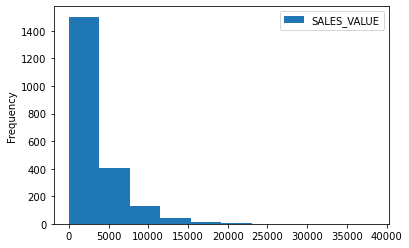

In [105]:
# HouseHold Analysis 1
# distribution of total sales value purchased at the household level
project_transactions.groupby('household_key')[['SALES_VALUE']].sum().plot(kind = 'hist')


In [19]:
# HouseHold Analysis 2
# Top 10 households by quantity purchased
project_transactions.groupby('household_key')[['QUANTITY']].sum().sort_values('QUANTITY', ascending = False).head(10)

,QUANTITY
household_key,
1023,4479917.0
755,3141769.0
1609,2146715.0
13,1863829.0
1430,1741892.0
1527,1734632.0
1762,1669880.0
707,1640193.0
1029,1496204.0


In [85]:
# HouseHold Analysis 3
# Top 10 households by sales value
H_S_total = project_transactions.groupby('household_key')[['SALES_VALUE']].sum().sort_values('SALES_VALUE', ascending = False).head(10)
H_S_total

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


<AxesSubplot:xlabel='household_key', ylabel='Total Sales Values'>

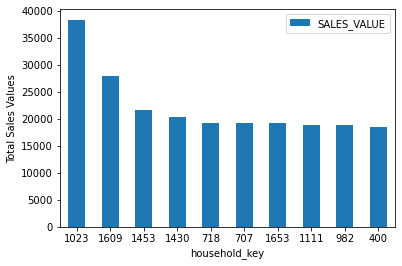

In [32]:
# HouseHold Analysis 4
# Plot the total sales value for our top 10 households by value, ordered from highest to lowest
H_S_total.plot(kind = 'bar',
               rot = 0,
               ylabel = 'Total Sales Values',)

<AxesSubplot:ylabel='PRODUCT_ID'>

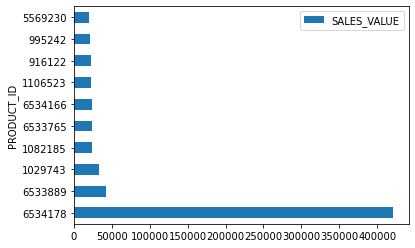

In [72]:
# Product Analysis 1
# Which products have the most sales by sales_value? Plot a horizontal bar chart 
P_S_total = project_transactions.groupby('PRODUCT_ID')[['SALES_VALUE']].sum().sort_values('SALES_VALUE', ascending = False).head(10)
P_S_total.plot(kind ='barh',
              )

In [80]:
# Product Analysis 2
#Did the top 10 selling items have a higher than average discount? (about Top 10 products by sale)

P_S_total1 = P_S_total
P_S_total1 = P_S_total1.reset_index()
avg_disc = project_transactions['total_discount'].mean()
p_req = project_transactions.loc[(project_transactions['PRODUCT_ID']).isin(P_S_total1['PRODUCT_ID'])]
cond3 = [(p_req['total_discount'] > avg_disc)] # condition
choice3 = ['Higher than average discount rate'] # choice
p_req['Discount check'] = np.select(cond3,choice3,default = 'Not Higher than Avg discount rate') 
# required coulmns/result is added
p_req

C:\Users\Abdullah Rashid\AppData\Local\Temp\ipykernel_2096\1780768060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_req['Discount check'] = np.select(cond3,choice3,default = 'Not Higher than Avg discount rate')


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,perc_discount,Discount check
16,98,26984951769,1,1082185,1,0.39,337,1,0.00,0,Higher than average discount rate
29,1172,26985025264,1,1106523,1,1.50,396,1,0.00,0,Higher than average discount rate
31,1172,26985025264,1,5569230,1,2.33,396,1,-2.26,0,Not Higher than Avg discount rate
69,1060,26985040735,1,1082185,1,0.84,315,1,0.00,0,Higher than average discount rate
80,1060,26985040735,1,5569230,1,2.33,315,1,-2.26,0,Not Higher than Avg discount rate
...,...,...,...,...,...,...,...,...,...,...,...
2146231,1098,42289918722,711,1082185,1,0.51,343,102,0.00,0,Higher than average discount rate
2146248,303,42289918892,711,995242,1,1.94,343,102,0.00,0,Higher than average discount rate
2146255,303,42289918892,711,1082185,1,1.10,343,102,0.00,0,Higher than average discount rate
2146278,761,42289921056,711,1029743,1,2.89,343,102,0.00,0,Higher than average discount rate


In [83]:
# Product Analysis 2 (remaining part)
# Did the top 10 selling items have a higher than average discount? answer is filtered by two methods:

# Product ID's are repeating so result is compiled and sorted (a bit tricky way)
#p_req.groupby('PRODUCT_ID')[['Discount check']].sum().sort_values('PRODUCT_ID',ascending = False)

# duplicates are droped (easy way)
p_req.drop_duplicates('PRODUCT_ID',ignore_index = True)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,perc_discount,Discount check
0,98,26984951769,1,1082185,1,0.39,337,1,0.00,0,Higher than average discount rate
1,1172,26985025264,1,1106523,1,1.50,396,1,0.00,0,Higher than average discount rate
2,1172,26985025264,1,5569230,1,2.33,396,1,-2.26,0,Not Higher than Avg discount rate
3,718,26997328096,2,1029743,1,2.49,324,1,0.00,0,Higher than average discount rate
4,924,27009222177,3,995242,1,1.99,400,1,0.00,0,Higher than average discount rate
5,480,27057806466,6,916122,2,8.83,433,2,-5.30,0,Not Higher than Avg discount rate
6,932,27115512626,12,6533765,1,2.18,422,2,0.00,0,Higher than average discount rate
7,932,27115512637,12,6534178,995,2.18,422,2,-0.01,0,Higher than average discount rate
8,646,27231726606,21,6534166,11524,25.00,408,4,-1.15,0,Not Higher than Avg discount rate
9,1476,27517183585,45,6533889,14609,32.86,316,7,-0.01,0,Higher than average discount rate


In [90]:
# Product Analysis 3
# what was the most common Product_ID among rows with the households in our top 10 households by sales? 
H_S_total # result from --> HouseHold Analysis 3 --> Top 10 households by sales value
H_S_total1 = H_S_total.reset_index() # because we dont want to affect the actual results of HouseHold Analysis 3
H_S_total1

,household_key,SALES_VALUE
0,1023,38319.79
1,1609,27859.68
2,1453,21661.29
3,1430,20352.99
4,718,19299.86
5,707,19194.42
6,1653,19153.75
7,1111,18894.72
8,982,18790.34
9,400,18494.14


In [91]:
# Product Analysis 3 (remaining part)
# finally most common Product_ID among rows with the households in our top 10 households by sales is extracted
p_req2 = project_transactions.loc[(project_transactions['household_key']).isin(H_S_total1['household_key'])]
p_req2['PRODUCT_ID'].value_counts() # result will be from most occuring to least occuring
# so top most is the required PRODUCT_ID with 576 times, the most common or occuring as shown in below o/p

1082185     576
1029743     573
6534178     561
6533889     418
1127831     230
           ... 
1086818       1
1060912       1
981797        1
864988        1
17937077      1
Name: PRODUCT_ID, Length: 13878, dtype: int64

In [93]:
# Product Analysis 4
# Look up the names of top 10 products by sales in the product.csv
path2 = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/Pandas+Course+Resources/Pandas Course Resources/project_data/product.csv'
products = pd.read_csv(path2)
products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [96]:
# Product Analysis 4 (remaining part)
# Look up the names of top 10 products by sales in the product.csv

p_req3 = products.loc[(products['PRODUCT_ID']).isin(P_S_total1['PRODUCT_ID'])]
# Names and other details of the top 10 products by sales can be seen in below o/p
# now if want only names then can use p_req3['SUB_COMMODITY_DESC'] as well

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [100]:
# Product Analysis 5
# Look up the product name of the item that had the highest quantity sold in a row (in the product.csv)

M_Q = (project_transactions['QUANTITY'].max()) # max quantity from overall statistics part
p_req4 = project_transactions.loc[project_transactions['QUANTITY']== M_Q]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,perc_discount
153840,630,28270956876,107,6534178,32740,72.0,384,16,-3.27,0


In [104]:
# Product Analysis 5 (Remaining part)
# Look up the product name of the item that had the highest quantity sold in a row (in the product.csv)
p_req5 = products.loc[(products['PRODUCT_ID']).isin(p_req4['PRODUCT_ID'])]
p_req5 

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
